# Classifier Demonstration

In [162]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [163]:
# load credit card data from website
bad_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')

# data munging to get it into nice csv format
#parsed_entries = [[e for e in row.split()] for row in bad_data.iloc[2:,0]]
#all_entries = []
#for r in parsed_entries:
#    all_entries.extend(r)
#all_entries = np.array(all_entries).reshape((1319,13))
#rows = [",".join(r) for r in all_entries]
#s = "\n".join(rows)
#titles = "Variance,Skewness,Curtosis,Entropy,Classes\n"

# save nice data
#with open("bankdetails.csv","w") as f:
#    f.write(titles)
#    f.write(s)
    
# load data into pandas dataframe
data = pd.read_csv("haberman.csv",
                  dtype = {"Age":np.int,
                           "Year":np.int,
                           "Nodes":np.int,
                           "Status":np.int})

# let's take a quick look at the data
print(data.head())

# set rng seed for reproducibility
np.random.seed(seed=1337)

# randomly partition data into train (80%) and test (20%) sets
train,test = train_test_split(data, test_size=.2)

   Age  Year  Nodes  Status
0   30    64      1       0
1   30    62      3       0
2   30    65      0       0
3   31    59      2       0
4   31    65      4       0


Accuracy: 0
ROC Curve:


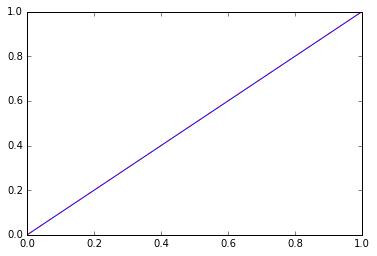

AUC: 0.5


In [164]:
# DECISION TREE
dt = DecisionTreeClassifier()
#print(train.iloc[:,0:])
#print(train.iloc[:,3])
# train the model
dt.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = dt.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = dt.predict_proba(test.iloc[:,1:])
#print(soft_pred)
fpr,tpr,thresh = roc_curve(test.iloc[:,3],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,3],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

Accuracy: 0
ROC Curve:


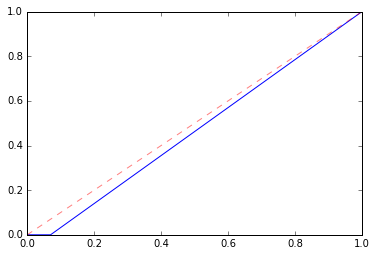

AUC: 0.46511627907


In [165]:
# RANDOM FOREST
rf = RandomForestClassifier()

# train the model
rf.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = rf.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = rf.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,3],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,3],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

Accuracy: 0
ROC Curve:


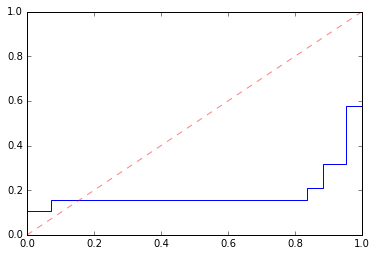

AUC: 0.187270501836


In [166]:
# GRADIENT BOOSTED TREES
gb = GradientBoostingClassifier()

# train the model
gb.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = gb.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = gb.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,3],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,3],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

Accuracy: 0
ROC Curve:


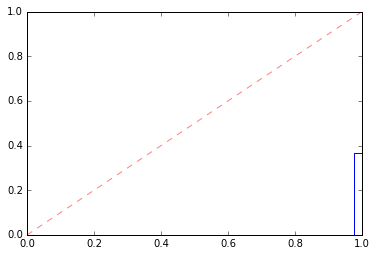

AUC: 0.00856793145655


In [167]:
# LOGISTIC REGRESSION
# initialize a logistric regression object
lr = LogisticRegression()

# train the model
lr.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = lr.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = lr.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,3],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,3],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

Accuracy: 0
ROC Curve:


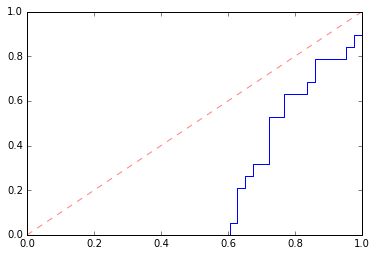

AUC: 0.225214198286


In [168]:
# SUPPORT VECTOR MACHINE
sv = SVC(probability=True)

# train the model
sv.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = sv.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = sv.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,3],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,3],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))